In [1]:
# !unzip /content/drive/MyDrive/dogs-vs-cats.zip -d ./content/

In [2]:
# !unzip /content/drive/MyDrive/dogs-vs-cats/train.zip -d /content/drive/MyDrive/dogs-vs-cats/

In [3]:
import os

root = "../data/"
path = "dogs-vs-cats/train"
os.listdir(root + "/" + path)

['dog.5118.jpg',
 'dog.1521.jpg',
 'cat.5061.jpg',
 'dog.7091.jpg',
 'cat.12172.jpg',
 'dog.12281.jpg',
 'cat.6421.jpg',
 'dog.11486.jpg',
 'dog.6947.jpg',
 'dog.3570.jpg',
 'cat.5646.jpg',
 'cat.7710.jpg',
 'cat.7878.jpg',
 'dog.10283.jpg',
 'cat.2521.jpg',
 'cat.8130.jpg',
 'dog.11877.jpg',
 'dog.7097.jpg',
 'cat.314.jpg',
 'dog.9575.jpg',
 'dog.4160.jpg',
 'cat.3101.jpg',
 'dog.11711.jpg',
 'cat.6176.jpg',
 'dog.8574.jpg',
 'cat.8387.jpg',
 'dog.3742.jpg',
 'cat.2925.jpg',
 'dog.10841.jpg',
 'dog.10815.jpg',
 'dog.11201.jpg',
 'dog.2796.jpg',
 'dog.1997.jpg',
 'cat.11264.jpg',
 'cat.6024.jpg',
 'dog.12257.jpg',
 'cat.2035.jpg',
 'dog.3730.jpg',
 'cat.7769.jpg',
 'cat.10914.jpg',
 'dog.8319.jpg',
 'dog.7447.jpg',
 'cat.9947.jpg',
 'dog.12363.jpg',
 'cat.9929.jpg',
 'cat.8843.jpg',
 'cat.3768.jpg',
 'dog.6606.jpg',
 'dog.1733.jpg',
 'dog.5259.jpg',
 'dog.12466.jpg',
 'cat.10834.jpg',
 'cat.7591.jpg',
 'dog.4923.jpg',
 'dog.4726.jpg',
 'dog.10040.jpg',
 'cat.9034.jpg',
 'cat.11788.jpg'

In [4]:
import os

full_names = os.listdir(root + "/" + path)

# Filter out directories and files that do not conform to the 'label.id.ext' pattern
# We assume image files are like 'cat.123.jpg' or 'dog.456.jpg'
image_files = [f for f in full_names if os.path.isfile(os.path.join(root, path, f)) and len(f.split('.')) == 3]

labels = [each.split(".")[0] for each in image_files]
file_id = [each.split(".")[1] for each in image_files]

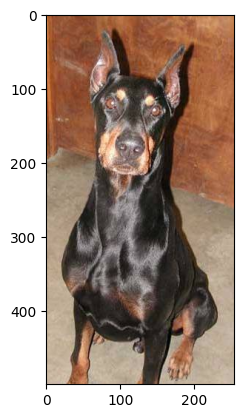

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample = random.choice(full_names)
image = mpimg.imread(root + "/" + path + "/" + sample)
plt.imshow(image)
plt.show()


In [6]:
sample = random.choice(full_names)
image = mpimg.imread(root + "/" + path + "/" + sample)
image.shape

(300, 399, 3)

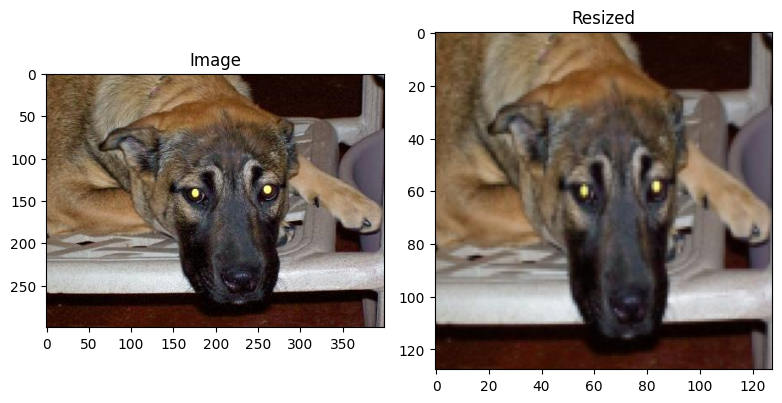

In [7]:
from skimage.transform import resize

resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

In [8]:
from tqdm import tqdm
import numpy as np

images = []
bar_total = tqdm(image_files)
for file in bar_total:
    image = mpimg.imread(root + "/" + path + "/" + file)
    images.append(resize(image, (32, 32, 3)))

images = np.array(images)

  0%|          | 5/25000 [00:00<20:30, 20.31it/s]

 42%|████▏     | 10565/25000 [11:09<15:15, 15.77it/s]


KeyboardInterrupt: 

In [ ]:
image.shape, labels[:3]

((499, 464, 3), ['dog', 'dog', 'dog'])

In [ ]:
images[:3]

array([[[[0.58278222, 0.61750361, 0.59381008],
         [0.49167876, 0.52615565, 0.50270371],
         [0.49722851, 0.51832269, 0.5085914 ],
         ...,
         [0.59160616, 0.60342452, 0.5998431 ],
         [0.55974694, 0.56016876, 0.55854955],
         [0.54091193, 0.54752539, 0.53692734]],

        [[0.59099185, 0.60311218, 0.60583546],
         [0.57026607, 0.58233356, 0.58502367],
         [0.57595118, 0.58458089, 0.58905776],
         ...,
         [0.57133565, 0.58210437, 0.5794278 ],
         [0.53787629, 0.53827646, 0.53654497],
         [0.58232492, 0.58898249, 0.578488  ]],

        [[0.5262705 , 0.52938466, 0.5507068 ],
         [0.53177912, 0.53492999, 0.55428712],
         [0.57058637, 0.57584881, 0.57927922],
         ...,
         [0.52228244, 0.5097629 , 0.52748387],
         [0.548271  , 0.54717339, 0.54381468],
         [0.59852676, 0.60592408, 0.59853043]],

        ...,

        [[0.75542335, 0.62211568, 0.5828799 ],
         [0.7735609 , 0.64042583, 0.60114566]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 1, 1]), array(['cat', 'dog'], dtype='<U3'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=13, stratify=labels_encoded
)

X_train.shape, X_test.shape


((20000, 32, 32, 3), (5000, 32, 32, 3))

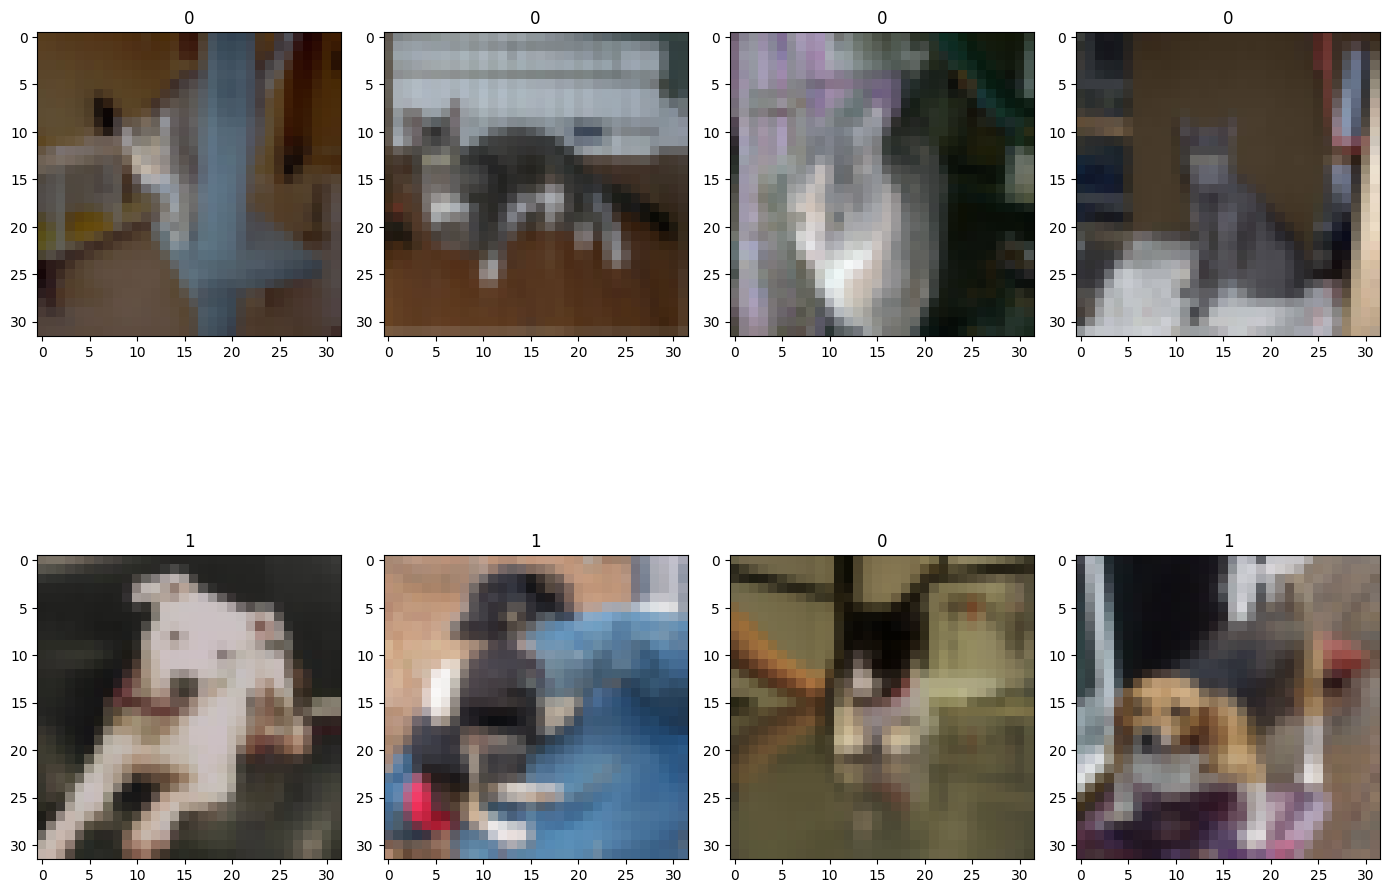

In [ ]:
samples = random.choices(population=range(0, 20000), k=8)

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx + 1)
    plt.imshow(X_train[n], cmap="Greys", interpolation="nearest")
    plt.title(y_train[n])

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(2, activation="softmax"),
    ]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Model: "sequential"

In [ ]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
import time

start_time = time.time()
hist = model.fit(
    X_train.reshape(20000, 32, 32, 3),
    y_train,
    epochs=10,
    verbose=1,
    validation_data=(X_test.reshape(5000, 32, 32, 3), y_test),
)

print("fit time : ", time.time() - start_time)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5594 - loss: 0.6797 - val_accuracy: 0.7146 - val_loss: 0.5856
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6810 - loss: 0.5938 - val_accuracy: 0.7314 - val_loss: 0.5450
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7173 - loss: 0.5483 - val_accuracy: 0.7440 - val_loss: 0.5226
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7415 - loss: 0.5150 - val_accuracy: 0.7622 - val_loss: 0.4841
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7505 - loss: 0.5002 - val_accuracy: 0.7696 - val_loss: 0.4796
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7599 - loss: 0.4906 - val_accuracy: 0.7882 - val_loss: 0.4543
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7736 - loss: 0.4683 - val_accuracy: 0.8028 - val_loss: 0.4368
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7901 - loss: 0.4428 - val_accuracy: 0

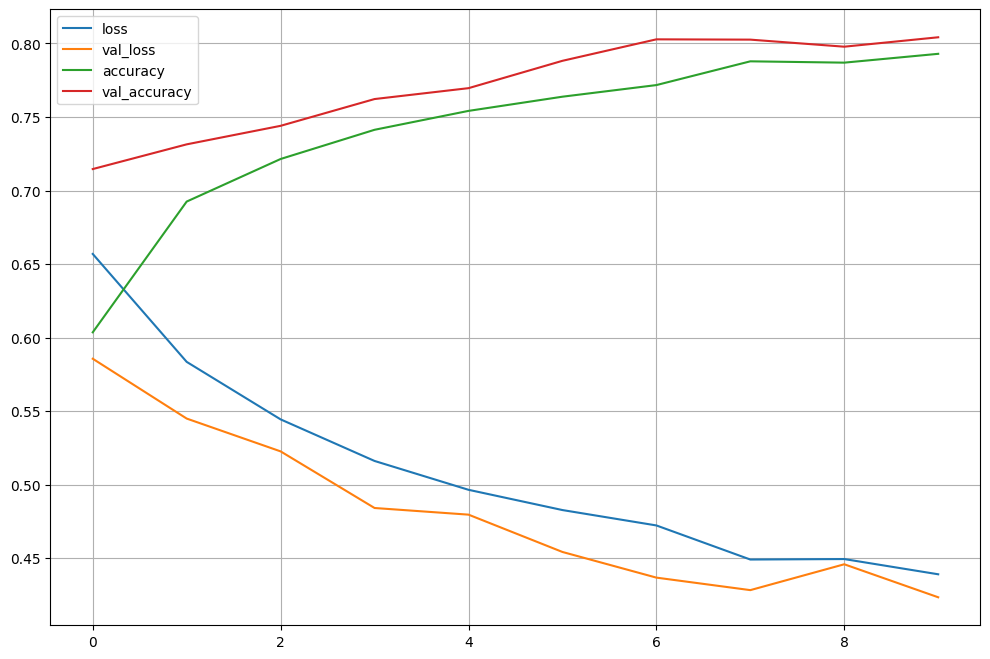

In [ ]:
plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [ ]:
!unzip /content/drive/MyDrive/dogs-vs-cats/test1.zip -d /content/drive/MyDrive/dogs-vs-cats/test1

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5499.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/55.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/550.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5500.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5501.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5502.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5503.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5504.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5505.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5506.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5507.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5508.jpg  
  inflating: /content/drive/MyDrive/dogs-vs-cats/test1/test1/5509.jpg  
  inflating: /co

In [ ]:
import os
import shutil

classes = ["cat", "dog"]

for class_name in classes:
    class_path = os.path.join(path, class_name)
    os.makedirs(root + "/" + class_path, exist_ok=True)

    for file in full_names:
        if class_name in file:
            shutil.move(
                os.path.join(root + "/" + path, file),
                os.path.join(root + "/" + class_path, file),
            )


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.2)


In [ ]:
batch_size = 32

train_generator = datagen.flow_from_directory(
    root + "/" + path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="binary",
    subset="training",
)
# Found 20000 images belonging to 2 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    root + "/" + path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",
)
# Found 5000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 3)),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(2, activation="softmax"),
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)
